# Loan Default Prediction Model
By: Aditya Vikram Singh

In [110]:
import pandas as pd               #import basic libraries 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

In [111]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
# from sklearn.model_selection import KFold #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

In [112]:
loan = pd.read_csv('Loan.csv', usecols = [0,1,2,3,4,5,6,7,8,9,10]) #read csv file

In [113]:
loan.head()

,Client ID,Loan_purpose,Loan Amount,Working Year,Applicant Income,Co-applicant Income,Account Balance,Delinq_2,interest rate,credit rating,default
0,110045,Animal Husbandry,34636,7,14453,7679,52301,2,16.0,498,0
1,110046,Animal Husbandry,65646,7,14953,3679,47343,1,14.0,629,0
2,110047,Animal Husbandry,44206,7,13916,12186,29691,1,17.0,638,1
3,110048,Animal Husbandry,36417,5,18345,6546,45237,0,16.0,685,0
4,110049,Animal Husbandry,45161,2,9318,7370,66107,0,16.0,658,1


In [114]:
Pur = loan['Loan_purpose'].value_counts(ascending=True)
Pur.head()

Trading               9
Animal Husbandry     11
Agriculture          12
Micro Enterprises    15
Name: Loan_purpose, dtype: int64

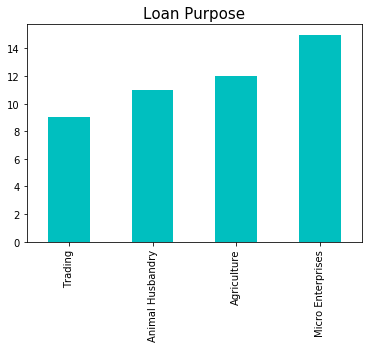

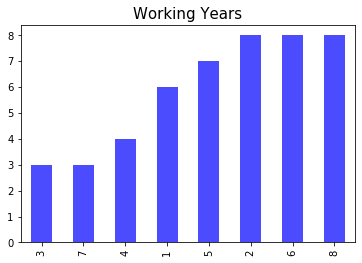

In [67]:
Pur.plot(kind='bar', color = 'c')
plt.title('Loan Purpose',size = 15)
plt.show()

print("")  #add blank gap

Workex = loan['Working Year'].value_counts(ascending=True)
Workex.head()

Workex.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Working Years',size = 15)
plt.show()


In [68]:
# exploring data type in the data frame 
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 11 columns):
Client ID              47 non-null int64
Loan_purpose           47 non-null object
Loan Amount            47 non-null int64
Working Year           47 non-null int64
Applicant Income       47 non-null int64
Co-applicant Income    47 non-null int64
Account Balance        47 non-null int64
Delinq_2               47 non-null int64
interest rate          47 non-null float64
credit rating          47 non-null int64
default                47 non-null int64
dtypes: float64(1), int64(9), object(1)
memory usage: 4.2+ KB


In [115]:
loan['TotalIncome'] = loan['Applicant Income'] + loan['Co-applicant Income'] #adding total income column

In [116]:
list(loan.columns)

['Client ID',
 'Loan_purpose',
 'Loan Amount',
 'Working Year',
 'Applicant Income',
 'Co-applicant Income',
 'Account Balance',
 'Delinq_2',
 'interest rate',
 'credit rating',
 'default',
 'TotalIncome']

In [117]:
#building predictive model 
#we will use scikit-learn (sklearn), for which we need to convert the categorical values into numerical values
from sklearn.preprocessing import LabelEncoder
var_col = ['Loan_purpose']
le = LabelEncoder()  #Encode labels with value between 0 and n_classes-1.
for i in var_col:
    loan[i] = le.fit_transform(loan[i]) #Fit label encoder and return encoded labels
loan.dtypes

Client ID                int64
Loan_purpose             int64
Loan Amount              int64
Working Year             int64
Applicant Income         int64
Co-applicant Income      int64
Account Balance          int64
Delinq_2                 int64
interest rate          float64
credit rating            int64
default                  int64
TotalIncome              int64
dtype: object

In [118]:
loan.describe()

,Client ID,Loan_purpose,Loan Amount,Working Year,Applicant Income,Co-applicant Income,Account Balance,Delinq_2,interest rate,credit rating,default,TotalIncome
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,110068.000000,1.446809,51026.957447,4.574468,16209.893617,8270.957447,44573.531915,0.468085,15.851064,624.851064,0.425532,24480.851064
std,13.711309,1.079624,10989.148108,2.411428,5362.800863,3290.618258,12221.301016,0.545777,1.560083,123.664866,0.499769,5645.176290
min,110045.000000,0.000000,30447.000000,1.000000,6277.000000,3112.000000,27427.000000,0.000000,14.000000,401.000000,0.000000,13603.000000
25%,110056.500000,0.500000,44840.000000,2.000000,11590.000000,5743.500000,33427.500000,0.000000,14.000000,516.500000,0.000000,20852.500000
50%,110068.000000,2.000000,51890.000000,5.000000,15989.000000,7679.000000,45089.000000,0.000000,16.000000,638.000000,0.000000,24792.000000
75%,110079.500000,2.000000,59677.500000,6.000000,19777.500000,10764.000000,52540.500000,1.000000,17.000000,743.500000,1.000000,28851.500000
max,110091.000000,3.000000,67224.000000,8.000000,24814.000000,14702.000000,68391.000000,2.000000,18.000000,798.000000,1.000000,35758.000000


# Distribution Plots

Text(0, 0.5, 'Index')

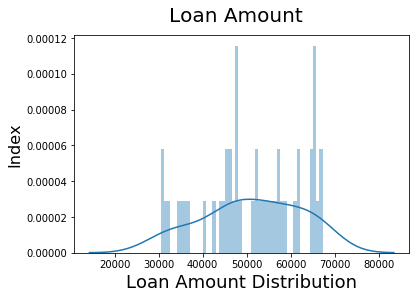

In [14]:
# Plotting terms to understand the distribution.
fig = plt.figure()
sns.distplot(loan['Loan Amount'],bins=50)
fig.suptitle('Loan Amount', fontsize=20)                             # Plot heading 
plt.xlabel('Loan Amount Distribution', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)  

Text(0, 0.5, 'Index')

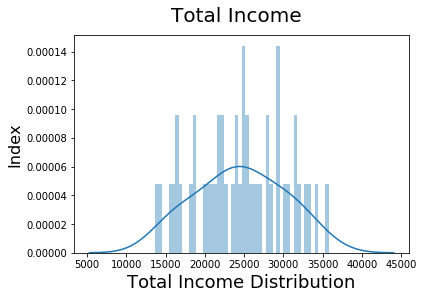

In [16]:
# Plotting terms to understand the distribution.
fig = plt.figure()
sns.distplot(loan['TotalIncome'],bins=50)
fig.suptitle('Total Income', fontsize=20)                             # Plot heading 
plt.xlabel('Total Income Distribution', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)  

(12.0, 0.0)

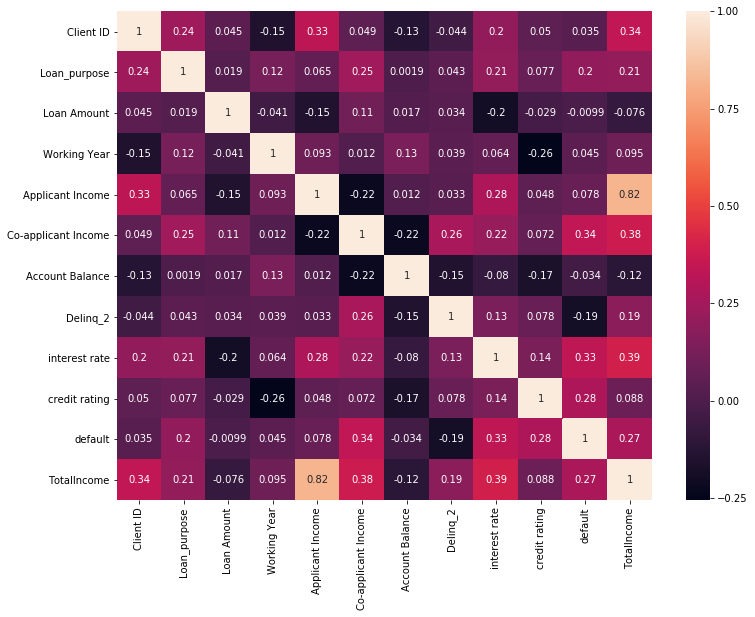

In [72]:
plt.figure(figsize=(12,9))               #correlation matrix
ax = sns.heatmap(loan.corr(),annot = True)
bottom, top = ax.get_ylim()              #fixing seaborn plotting issues
ax.set_ylim(bottom + 0.5, top - 0.5)

In [119]:
# Putting feature variable to A
A = loan[['Loan_purpose','Loan Amount','Working Year','TotalIncome','Account Balance','Delinq_2','interest rate','credit rating']]

# Putting response variable to B
B = loan['default']

# Feature Importance

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.11669302 0.09681294 0.07391333 0.19575474 0.10717473 0.07909005
 0.17183366 0.15872754]

Loan_purpose       0.116693
Loan Amount        0.096813
Working Year       0.073913
TotalIncome        0.195755
Account Balance    0.107175
Delinq_2           0.079090
interest rate      0.171834
credit rating      0.158728
dtype: float64


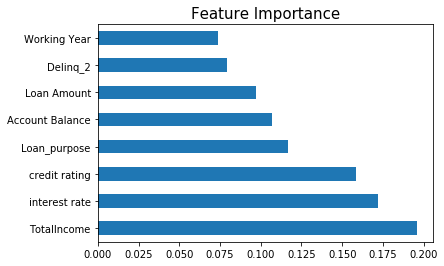

In [120]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(A,B)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=A.columns)
print("")                         #create a gap between presentation
print(feat_importances)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importance',size = 15)
plt.show()

# Classificatio Model with KFolds Cross Validation 

In [125]:
#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
    model.fit(data[predictors],data[outcome])
    predictions = model.predict(data[predictors])
    accuracy = metrics.accuracy_score(predictions,data[outcome])
    print("Accuracy :" "{0:.2%}".format(accuracy))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(predictions,data[outcome])))
    r_squared = metrics.r2_score(predictions,data[outcome])
    print('r_square_value :',"{0:.2%}".format(r_squared))
    
    plt.title('Confusion Matrix',size=14)
    ax = sns.heatmap(confusion_matrix(data[outcome],predictions), annot=True,annot_kws={"size": 16},cmap="YlGnBu") #print(confusion_matrix(data[outcome],predictions))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    bottom, top = ax.get_ylim()                             #fixing seaborn plotting issues
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
    print(classification_report(data[outcome],predictions))
    
    
    kf = KFold(5,True,1)
    error = []
    
    for train, test in kf.split(data):
        train_predictors = (data[predictors].iloc[train,:])
        train_target = data[outcome].iloc[train]
        model.fit(train_predictors, train_target)
        error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
        
    print("Cross-Validation Score :" "{0:.2%}".format(np.mean(error)))
    print("Cross-Validation Score :" "{0:.2%}".format(np.mean(cross_val_score(model, data[predictors], data[outcome], cv=5))))
    #Fit the model again so that it can be refered outside the function:
    model.fit(data[predictors],data[outcome])

# Logistic Regression

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

Accuracy :68.09%
Root Mean Squared Error: 0.564932682866032
r_square_value : -38.24%
              precision    recall  f1-score   support

           0       0.70      0.78      0.74        27
           1       0.65      0.55      0.59        20

    accuracy                           0.68        47
   macro avg       0.67      0.66      0.67        47
weighted avg       0.68      0.68      0.68        47

Cross-Validation Score :50.89%
Cross-Validation Score :56.00%


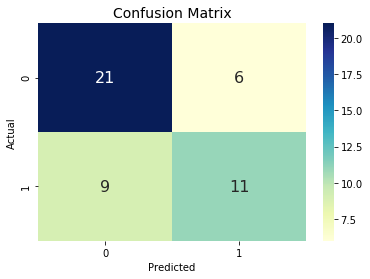

In [126]:
#using Logistic reasoning 
outcome_var = ['default']
model = LogisticRegression()
predictor_var = ['Loan_purpose','Loan Amount','Working Year','TotalIncome','Account Balance','Delinq_2','interest rate','credit rating']
classification_model(model,loan,predictor_var,outcome_var)

Text(0, 0.5, 'Default Conf')

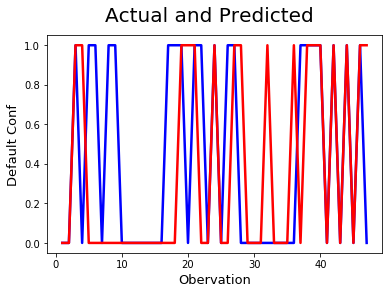

In [53]:
#Result Graph
f = np.arange(1,48,1)            
fig = plt.figure()
plt.plot(f,B, color="blue", linewidth=2.5, linestyle="-")
plt.plot(f,model.predict(A), color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)
plt.xlabel('Obervation',size=13)
plt.ylabel('Default Conf',size=13)

In [43]:
Logistics = pd.DataFrame(model.predict(A),B,columns=['Predicted'])  #Result List
Logistics

,Predicted
default,
0,0
0,0
1,1
0,1
1,0
1,0
0,0
1,0
1,0


# Decision Tree

Accuracy :100.00%
Root Mean Squared Error: 0.0
r_square_value : 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        20

    accuracy                           1.00        47
   macro avg       1.00      1.00      1.00        47
weighted avg       1.00      1.00      1.00        47

Cross-Validation Score :57.33%


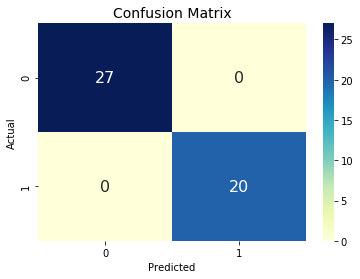

In [82]:
#using Decision Tree
model = DecisionTreeClassifier()
predictor_var = ['Loan_purpose','Loan Amount','Working Year','TotalIncome','Account Balance','Delinq_2','interest rate','credit rating']
classification_model(model,loan,predictor_var,outcome_var)

Text(0, 0.5, 'Default Conf')

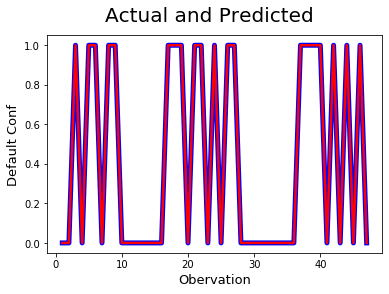

In [52]:
#Result Graph
f = np.arange(1,48,1)            
fig = plt.figure()
plt.plot(f,B, color="blue", linewidth=5, linestyle="-")
plt.plot(f,model.predict(A), color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)
plt.xlabel('Obervation',size=13)
plt.ylabel('Default Conf',size=13)

In [53]:
Tree = pd.DataFrame(model.predict(A),B,columns=['Predicted'])  #Result List
Tree

,Predicted
default,
0,0
0,0
1,1
0,0
1,1
1,1
0,0
1,1
1,1


# Random Forest 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Accuracy :100.00%
Root Mean Squared Error: 0.0
r_square_value : 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        20

    accuracy                           1.00        47
   macro avg       1.00      1.00      1.00        47
weighted avg       1.00      1.00      1.00        47



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sa

Cross-Validation Score :62.22%


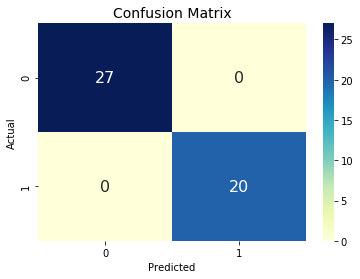

In [83]:
#using Random Forest 
model = RandomForestClassifier(n_estimators=20)
predictor_var = ['Loan_purpose','Loan Amount','Working Year','TotalIncome','Account Balance','Delinq_2','interest rate','credit rating']
classification_model(model,loan,predictor_var,outcome_var)

Text(0, 0.5, 'Default Conf')

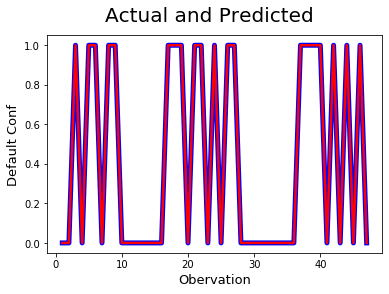

In [100]:
#Result Graph
f = np.arange(1,48,1)            
fig = plt.figure()
plt.plot(f,B, color="blue", linewidth=5, linestyle="-")
plt.plot(f,model.predict(A), color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)
plt.xlabel('Obervation',size=13)
plt.ylabel('Default Conf',size=13)

In [60]:
Forest = pd.DataFrame(model.predict(A),B,columns=['Predicted'])  #Result List
Forest

,Predicted
default,
0,0
0,0
1,1
0,0
1,1
1,1
0,0
1,1
1,1


# KNearest Neighbours 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:27: DataConversionWarning: A column-vec

Accuracy :76.60%
Root Mean Squared Error: 0.4837794468468967
r_square_value : -16.97%
              precision    recall  f1-score   support

           0       0.74      0.93      0.82        27
           1       0.85      0.55      0.67        20

    accuracy                           0.77        47
   macro avg       0.79      0.74      0.74        47
weighted avg       0.78      0.77      0.75        47

Cross-Validation Score :57.33%


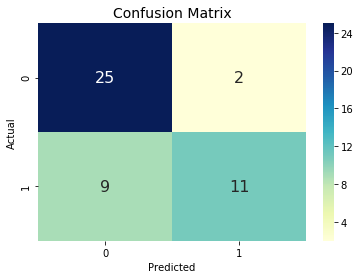

In [84]:
model = KNeighborsClassifier(n_neighbors=5)
predictor_var = ['Loan_purpose','Loan Amount','Working Year','TotalIncome','Account Balance','Delinq_2','interest rate','credit rating']
classification_model(model,loan,predictor_var,outcome_var)

Text(0, 0.5, 'Default Conf')

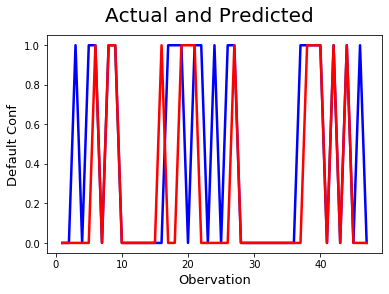

In [18]:
#Result Graph
f = np.arange(1,48,1)            
fig = plt.figure()
plt.plot(f,B, color="blue", linewidth=2.5, linestyle="-")
plt.plot(f,model.predict(A), color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)
plt.xlabel('Obervation',size=13)
plt.ylabel('Default Conf',size=13)

In [19]:
KNN = pd.DataFrame(model.predict(A),B,columns=['Predicted'])  #Result List
KNN

,Predicted
default,
0,0
0,0
1,0
0,0
1,0
1,1
0,0
1,1
1,1


In [84]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x = np.array(A) #Prepare data for neural network engine
y = np.array(B)

X = sc.fit_transform(x) #nomalizing x 
Y = y


# Neural Network 

In [87]:
# first neural network with keras make predictions
from keras.models import Sequential
from keras.layers import Dense

# define the keras model
model = Sequential()
model.add(Dense(12,input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the keras model on the dataset
model.fit(X,Y, epochs=150, batch_size=10, verbose=0)

# make class predictions with the model
predictions = model.predict_classes(X)

model.summary()

print("") #blank gap

accuracy = metrics.accuracy_score(predictions,Y)
print("Accuracy :" "{0:.2%}".format(accuracy))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(predictions,Y)))

Model: "sequential_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_138 (Dense)            (None, 12)                108       
_________________________________________________________________
dense_139 (Dense)            (None, 8)                 104       
_________________________________________________________________
dense_140 (Dense)            (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________

Accuracy :91.49%
Root Mean Squared Error: 0.2917299829957891


              precision    recall  f1-score   support

           0       0.96      0.89      0.92        27
           1       0.86      0.95      0.90        20

    accuracy                           0.91        47
   macro avg       0.91      0.92      0.91        47
weighted avg       0.92      0.91      0.92        47



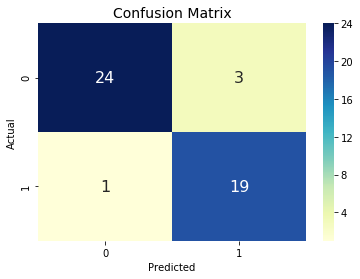

In [88]:
plt.title('Confusion Matrix',size=14)
ax = sns.heatmap(confusion_matrix(Y,predictions), annot=True,annot_kws={"size": 16},cmap="YlGnBu") #print(confusion_matrix(data[outcome],predictions))
plt.xlabel('Predicted')
plt.ylabel('Actual')
bottom, top = ax.get_ylim()                             #fixing seaborn plotting issues
ax.set_ylim(bottom + 0.5, top - 0.5)
    
print(classification_report(Y,predictions))

In [89]:
Result = pd.DataFrame(predictions,Y,columns=['Predicted'])  #Result List
Result

,Predicted
0,0
0,0
1,1
0,1
1,1
1,1
0,0
1,0
1,1
0,0
